In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import mixedlm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
cholesterol = pd.read_csv(r'data_set/cholesterol.csv', index_col=0)
cholesterol

,trt,response
1,1time,3.8612
2,1time,10.3868
3,1time,5.9059
4,1time,3.0609
5,1time,7.7204
6,1time,2.7139
7,1time,4.9243
8,1time,2.3039
9,1time,7.5301
10,1time,9.4123


In [5]:
# 各组样本大小
cholesterol.groupby('trt').count()

,response
trt,
1time,10
2times,10
4times,10
drugD,10
drugE,10


In [6]:
# 各组均值
cholesterol.groupby('trt').mean()

,response
trt,
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


In [7]:
# 各组标准差
cholesterol.groupby('trt').std()

,response
trt,
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


In [8]:
# 检验组间差异
# statsmodels库调用aov函数可用于执行方差分析
model = smf.ols('response ~ C(trt)', data=cholesterol).fit()
model

In [9]:
# sum_sq: 
#   1) C(trt) 组间平方和 方差error sum of square （SSB）误差平方和，各组均值与总均值的误差平方和，反映各样本均值之间的差异程度 
#   2）Residual 组内平方和，各组数据与其均值的误差平方和，反映每个样本各观测值得离散情况
# mean_sq: mean squared error 均方误差
# df: 自由度
# F值：检验组间方差和组内方差的比率
# PR(>F): p值，用于判断组间差异是否显著。如果p值小于显著性水平（通常是0.05），则可以拒绝原假设（即组间均值相等）。
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(trt),4.0,1351.369014,337.842253,32.432826,9.818516e-13
Residual,45.0,468.750438,10.416676,NaN,NaN


In [8]:
# 解释sm.stats.anova_lm(model, type=2)
# type=1: Type I ANOVA(顺序方差分析)，假设每个因子在模型中的顺序是有意义的，计算每个因子时忽略其他因子对模型的贡献
# type=2: Type II ANOVA(平衡方差分析)，假设所有因子是平衡的，计算每个因子的效果时考虑其他因子，但不包括因子之间的交互作用
# type=3: Type III ANOVA(全模型方差分析)，假设模型中的所有因子和交互作用都是相关的，计算每个因子的效果时考虑其他因子和交互作用

In [9]:
cholesterol.response.mean()

12.738081999999999

In [10]:
((cholesterol.groupby('trt').mean() - cholesterol.response.mean()).apply(np.square) * 10).sum()

response    1351.369014
dtype: float64

In [11]:
tmp = cholesterol.merge(cholesterol.groupby('trt').mean().reset_index(), on='trt', how='left')

In [12]:
np.square(tmp.response_x - tmp.response_y).sum()

468.750438055

In [20]:
# 多重比较
tukey = pairwise_tukeyhsd(cholesterol[['response']], cholesterol[['trt']], alpha=0.05)
tukey

In [21]:
# 给出置信区间的上下限有什么用？
# 1、
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1time,2times,3.443,0.1381,-0.6583,7.5443,False
1time,4times,6.5928,0.0004,2.4915,10.6941,True
1time,drugD,9.5792,0.0,5.4779,13.6805,True
1time,drugE,15.1656,0.0,11.0643,19.2668,True
2times,4times,3.1498,0.205,-0.9515,7.2511,False
2times,drugD,6.1362,0.001,2.0349,10.2375,True
2times,drugE,11.7226,0.0,7.6213,15.8238,True
4times,drugD,2.9864,0.2512,-1.1149,7.0877,False
4times,drugE,8.5727,0.0,4.4715,12.674,True
drugD,drugE,5.5864,0.0031,1.4851,9.6876,True


In [16]:
# 单因素协方差分析
litter = pd.read_csv(r'data_set/litter.csv', index_col=0)

In [17]:
litter.groupby('dose').mean()

,weight,gesttime,number
dose,,,
0,32.308500,22.075000,13.400000
5,29.308421,22.210526,13.105263
50,29.866111,21.888889,14.666667
500,29.646471,22.176471,12.529412


In [39]:
litter_model = smf.ols('weight ~ gesttime + C(dose)', data=litter).fit()
litter_model

In [40]:
litter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.067
Date:                Mon, 12 Aug 2024   Prob (F-statistic):            0.00511
Time:                        14:18:32   Log-Likelihood:                -206.55
No. Observations:                  74   AIC:                             423.1
Df Residuals:                      69   BIC:                             434.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -45.3656     24.984     -1.816      0.074     -95.206       4.475
C(dose)[T.5]      -3.4769      1.318     -2.639      0.010      -6.105      -0.849
C(dose)[T.50]     -1.7875      1.344     -1.330      0.188      -4.468       0.893
C(dose)[T.500]    -3.0191      1.352     -2.232      0.029      -5.717      -0.321
gesttime           3.5186      1.131      3.111      0.003       1.262       5.775
==============================================================================
Omnibus:                        3.438   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.082
Skew:                          -0.500   Prob(JB):                        0.214
Kurtosis:                       2.991   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
sm.stats.anova_lm(litter_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),3.0,109.933689,36.644563,2.261579,0.089410
gesttime,1.0,161.493099,161.493099,9.966809,0.002403
gesttime:C(dose),3.0,81.867930,27.289310,1.684204,0.178889
Residual,66.0,1069.403894,16.203089,NaN,NaN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19844\3565167124.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.95)` for the same effect.

  sns.pointplot(x='gesttime', y='weight', data=litter, ci=0.95)


<Axes: xlabel='gesttime', ylabel='weight'>

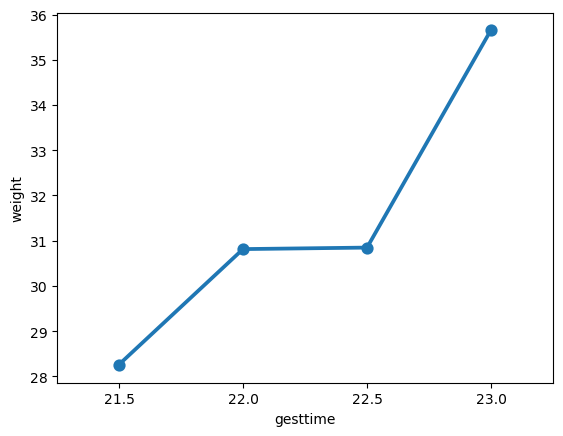

In [44]:
sns.pointplot(x='gesttime', y='weight', data=litter, ci=0.95)

In [22]:
# 双因素方差分析
toothgrowth = pd.read_csv(r'data_set/toothgrowth.csv', index_col=0)
toothgrowth

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


In [17]:
toothgrowth.columns

Index(['len', 'supp', 'dose'], dtype='object')

In [23]:
# 每组样本量的统计
toothgrowth.groupby(['supp', 'dose'])[['len']].count().unstack()

len        
dose 0.5 1.0 2.0
supp            
OJ    10  10  10
VC    10  10  10

In [24]:
# 样本组的均值
toothgrowth.groupby(['supp', 'dose'])[['len']].mean().unstack()

len              
dose    0.5    1.0    2.0
supp                     
OJ    13.23  22.70  26.06
VC     7.98  16.77  26.14

In [25]:
# 样本组的标准差
toothgrowth.groupby(['supp', 'dose'])[['len']].std().unstack()

len                    
dose       0.5       1.0       2.0
supp                              
OJ    4.459709  3.910953  2.655058
VC    2.746634  2.515309  4.797731

In [26]:
tooth_model = smf.ols('len ~ C(dose) * C(supp)', data=toothgrowth).fit()

In [27]:
# mean_sq = sum_sq / df
# F 各因素的mean_sq / 残差的mean_sq
sm.stats.anova_lm(tooth_model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose):C(supp),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


<Axes: xlabel='dose', ylabel='len'>

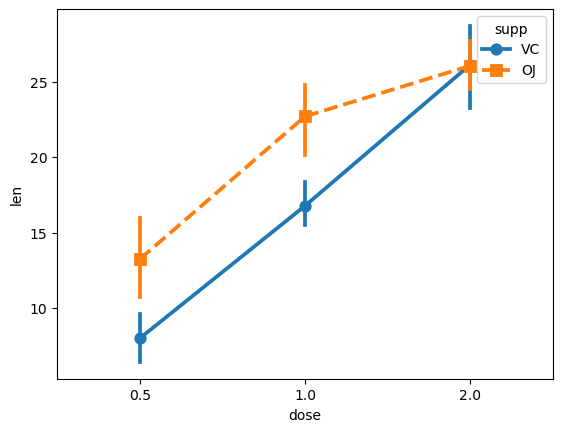

In [25]:
# seaborn 实现interaction plot
# 绘制交互作用图
# 该图展示了各剂量喂食下豚鼠牙齿长度的均值
sns.pointplot(x='dose', y='len', hue='supp', data=toothgrowth, markers=['o', 's'], linestyles=['-', '--'])

In [26]:
# 另一种图形表现方式
# 计算均值和置信区间
# 补充plot.errorbar的参数
# 单因素的处理方式
group_means = toothgrowth.groupby(['dose', 'supp'])['len'].mean()
group_counts = toothgrowth.groupby(['dose', 'supp'])['len'].count()
group_sems = toothgrowth.groupby(['dose', 'supp'])['len'].sem()
confidence_interval = stats.t.ppf(0.95, group_counts - 1) * group_sems

group_stats = pd.DataFrame({
    'Mean': group_means,
    'CI_Lower': group_means - confidence_interval,
    'CI_Upper': group_means + confidence_interval
})

print(group_stats)

            Mean   CI_Lower   CI_Upper
dose supp                             
0.5  OJ    13.23  10.644791  15.815209
     VC     7.98   6.387828   9.572172
1.0  OJ    22.70  20.432894  24.967106
     VC    16.77  15.311923  18.228077
2.0  OJ    26.06  24.520913  27.599087
     VC    26.14  23.358846  28.921154


In [27]:
# 双因素的处理方式
summary = toothgrowth.groupby(['dose', 'supp']).agg(['mean', 'count', 'std'])['len']
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, summary['count'] - 1)
summary.reset_index(inplace=True)

print(summary)

   dose supp   mean  count       std       sem      ci95
0   0.5   OJ  13.23     10  4.459709  1.410284  3.190283
1   0.5   VC   7.98     10  2.746634  0.868562  1.964824
2   1.0   OJ  22.70     10  3.910953  1.236752  2.797727
3   1.0   VC  16.77     10  2.515309  0.795410  1.799343
4   2.0   OJ  26.06     10  2.655058  0.839603  1.899314
5   2.0   VC  26.14     10  4.797731  1.517176  3.432090


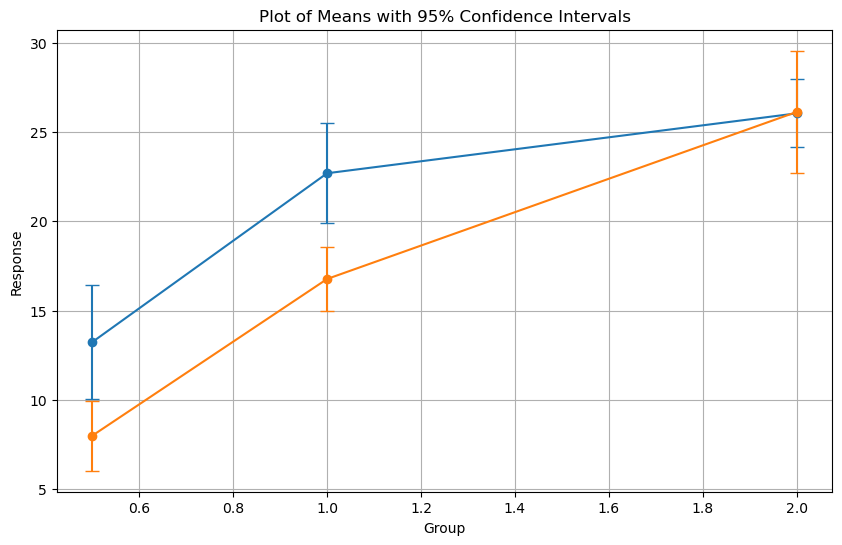

In [28]:
plt.figure(figsize=(10, 6))
for key, grp in summary.groupby('supp'):
    plt.errorbar(grp['dose'], grp['mean'], yerr=grp['ci95'], fmt='o-', capsize=5, label=key)


plt.title('Plot of Means with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Response')
plt.grid(True)
plt.show()

In [3]:
# 重复测试的方差分析
co2 = pd.read_csv(r'data_set/co2.csv', index_col=0)
co2

,Plant,Type,Treatment,conc,uptake
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
...,...,...,...,...,...
80,Mc3,Mississippi,chilled,250,17.9
81,Mc3,Mississippi,chilled,350,17.9
82,Mc3,Mississippi,chilled,500,17.9
83,Mc3,Mississippi,chilled,675,18.9


In [4]:
w1b1 = co2[co2['Treatment'] == 'chilled']
w1b1

,Plant,Type,Treatment,conc,uptake
22,Qc1,Quebec,chilled,95,14.2
23,Qc1,Quebec,chilled,175,24.1
24,Qc1,Quebec,chilled,250,30.3
25,Qc1,Quebec,chilled,350,34.6
26,Qc1,Quebec,chilled,500,32.5
27,Qc1,Quebec,chilled,675,35.4
28,Qc1,Quebec,chilled,1000,38.7
29,Qc2,Quebec,chilled,95,9.3
30,Qc2,Quebec,chilled,175,27.3
31,Qc2,Quebec,chilled,250,35.0


In [5]:
# conc Type及其交互项是固定效应
# Plant 是随机效应
# groups参数指定随机效应分组
# re_formula参数指定随机效应的公式
w1b1_model = mixedlm('uptake ~ Type * conc', data = w1b1, groups = w1b1['Plant'], re_formula = '~ conc').fit()
w1b1_model

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [6]:
# summary解释
# Model：显示模型类型
# Dependent Variable：因变量名称
# No.Observations：样本数量
# No.Groups：分组数量，表示随机效应分组的数量
# Min.group size：最小分组大小（最少的观测值数量）
# Max.group size：最大分组大小（最多的观测数量）
# Mean group size：平均分组大小
# Method：模型拟合方法，一般是'REML'（限制最大似然法，Restricted Maximum Likelihood）
# Scale：残差的方差估计
# Log-Likelihood：对数似然值
# Converged：是否收敛

# Fixed Effects（固定效应）
# Coef：每个固定效应的估计值
# Std.Err（标准误差）：估计系数的不确定性，误差越小估值越精确
# z：该系数与其标准误差的比值，用于进行假设检验，计算公式为'Coef / Std.Err'
# P>|z|：P值，用于检验系数是否显著，通常，P值小于0.05表示该系数在统计上显著
# 95% 置信区间

# Random Effects（随机效应）
# Group Var（组内方差）：随机效应分组的方差估计

w1b1_model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM   Dependent Variable:   uptake   
No. Observations:   42        Method:               REML     
No. Groups:         6         Scale:                23.5276  
Min. group size:    7         Log-Likelihood:       -160.5723
Max. group size:    7         Converged:            Yes      
Mean group size:    7.0                                      
-------------------------------------------------------------
                    Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           12.542    2.008 6.245 0.000  8.606 16.478
Type[T.Quebec]       8.879    2.840 3.126 0.002  3.313 14.446
conc                 0.008    2.800 0.003 0.998 -5.481  5.496
Type[T.Quebec]:conc  0.016    3.960 0.004 0.997 -7.746  7.779
Group Var            1.388                                   
Group x conc Cov     0.004                                   
conc Var            23.527                                   
=============================================================

"""

In [7]:
# F值是统计学中用于检验多个样本均值是否相等的统计量，特别用于方差分析（ANOVA）和回归分析
# F值本质上反映了组间变异和组内变异的相对大小，用于确定模型中的某些效应是否显著
# F值 = 组间均方（MSB） / 组内均方（MSW）
# 组间均方衡量不同组之间均值的差异，反映了处理效应或解释变量的效应
# 组内均方衡量同一组内观测值的变异，反映了数据的随机误差或噪声
# F值越大，说明组间差异相对于组内差异越大，即组间差异并非由随机因素造成的可能性越大
# 大F值：表示组间差异大于组内差异，意味着解释变量对因变量有显著影响，通常这对应于显著性检验中的小P值，说明有理由拒绝原假设，认为组间均值有显著差异
# 小F值：表示组间差异和组内差异相差不大，说明解释变量可能对因变量没有显著影响
# 1）方差分析：用于检验多组数据的均值是否相等，在单因素方差分析中，使用F检验来判断不同组的均值是否存在显著差异
# 2）回归分析：在回归分析中，F值用于检验回归模型中自变量是否整体上显著解释了因变量的变异，F检验可以用来比较全模型和仅有截距项的模型，以确定自变量整体影响
sm.stats.anova_lm(smf.ols('uptake ~ C(conc) * C(Type)', data = w1b1).fit(), type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(conc),6.0,1472.390000,245.398333,23.797026,8.729852e-10
C(Type),1.0,2667.240238,2667.240238,258.650435,1.128563e-15
C(conc):C(Type),6.0,428.828095,71.471349,6.930795,1.367337e-04
Residual,28.0,288.740000,10.312143,NaN,NaN


In [26]:
# 组间因子表示不同组的不同水平
# 组内因子表示同一组内的不同测量时间点或者条件

aovrm = AnovaRM(w1b1, depvar = 'uptake', subject = 'Plant', within = ['Type', 'conc'])
aovrm.fit().summary()

ValueError: Independent variables are collinear.

In [ ]:
# 在进行方差分析之前需要做
# 正态性校验：1）图示法 2）Shapiro_wilk正规性验证（scipy.stats.shapiro）
# 方差齐性检验：
# 1）方差比 
# 2）Hartley检验：用于多组方差检验，用多组中最大方差比最小方差
# 3）Levene检验：
# 4）BF：
# 5）Bartlett检验：通过求取不同组之间的卡方统计量，根据卡方统计量的值来判断组间方差是否相等

In [ ]:
# 多因素方差分析，用于研究一个因变量是否受到多个自变量的影响，它检验多个因素取值水平的不同组合之间，因变量得均值之间是否存在显著差异。
# 主效应是每个因素单独对观测指标的影响
# 交互效应是两个或多个因素共同作用对观测指标产生的影响
# 如果只有主效应显著，说明各因素独立地影响观测指标
# 如果交互效应显著，说明因素之间存在相互影响，需要进一步分析交互效应的性质和方向

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19844\255388499.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.05)` for the same effect.

  sns.pointplot(x='conc', y='uptake', hue='Type', data=w1b1, ci=0.05)


<Axes: xlabel='conc', ylabel='uptake'>

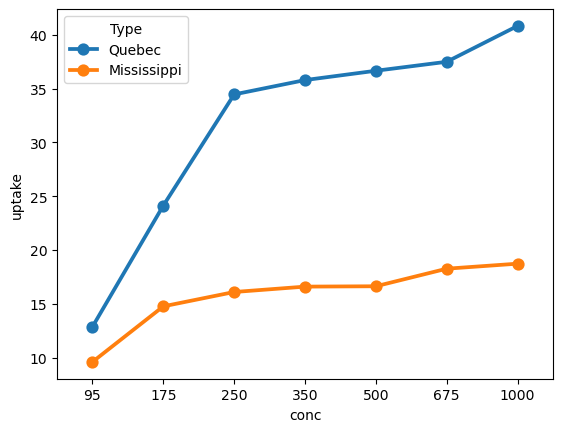

In [13]:
# x 分组变量，可以是数组、列表或者列名称
# y 计算统计量的数值变量，可以是数组、列表或者列名称
# hue 分类变量 用于进一步细分x变量
# data
# order，hue_order 用于指定x和hue变量的显示顺序
# estimator 用于计算数据点的统计量函数，默认为均值
# ci 置信区间大小
# n_boot 用于计算置信区间的bootstrap迭代次数
# units 如果有重复值，指定一个标识重复值的变量
# dodge 当hue被设置时，是否将点错开已避免重叠
# join 是否将点用线连接起来
# scale 调整点的大小
# orient 设置图表的方向
# color 控制图中点和线的颜色
# palette 调色
# marker 点的形状
# linestyle 连接线的样式
# errwidth 误差线的宽度
# capsize 控制误差线末端帽子的大小
# ax
sns.pointplot(x='conc', y='uptake', hue='Type', data=w1b1, ci=0.05)

<Axes: xlabel='conc', ylabel='uptake'>

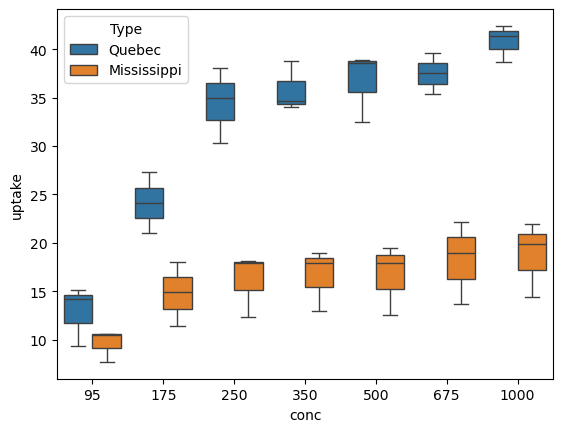

In [14]:
sns.boxplot(x='conc', y='uptake', hue='Type', data=w1b1)